In [5]:
!pip install tensorflow-gpu

In [8]:
!nvidia-smi

Fri Sep 11 11:34:40 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    25W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [9]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [11]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Python Projects/Malaria Detection using Deep Learning/Dataset/Train'
valid_path = '/content/drive/My Drive/Python Projects/Malaria Detection using Deep Learning/Dataset/Test'

In [12]:
# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


80142336/80134624 [==============================] - 3s 0us/step


In [13]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [14]:
  # useful for getting number of classes
folders = glob('/content/drive/My Drive/Python Projects/Malaria Detection using Deep Learning/Dataset/Train/*')

In [15]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [16]:
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)


In [17]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [18]:
# view the structure of the model
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [19]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [20]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [22]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Python Projects/Malaria Detection using Deep Learning/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Python Projects/Malaria Detection using Deep Learning/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 416 images belonging to 2 classes.
Found 144 images belonging to 2 classes.


In [23]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
13/13 [==============================] - 288s 22s/step - loss: 1.5090 - accuracy: 0.5457 - val_loss: 2.2387 - val_accuracy: 0.3750
Epoch 2/5
13/13 [==============================] - 7s 564ms/step - loss: 0.9309 - accuracy: 0.6034 - val_loss: 0.6205 - val_accuracy: 0.6458
Epoch 3/5
13/13 [==============================] - 7s 568ms/step - loss: 0.5979 - accuracy: 0.6779 - val_loss: 0.6446 - val_accuracy: 0.6458
Epoch 4/5
13/13 [==============================] - 7s 575ms/step - loss: 0.4979 - accuracy: 0.7716 - val_loss: 0.5122 - val_accuracy: 0.7708
Epoch 5/5
13/13 [==============================] - 8s 586ms/step - loss: 0.3375 - accuracy: 0.8606 - val_loss: 0.4150 - val_accuracy: 0.8264


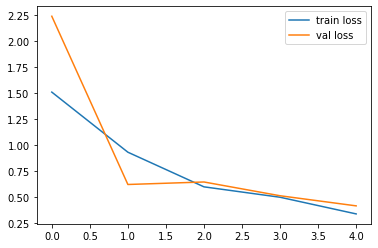

<Figure size 432x288 with 0 Axes>

In [24]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

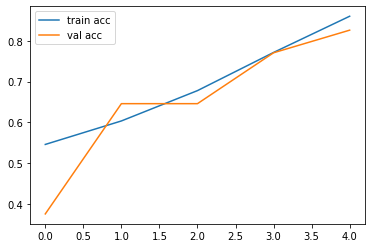

<Figure size 432x288 with 0 Axes>

In [26]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [27]:
y_pred = model.predict(test_set)

y_pred

array([[6.91183031e-01, 3.08816969e-01],
       [9.63484883e-01, 3.65151390e-02],
       [9.88123834e-01, 1.18762264e-02],
       [9.77339089e-01, 2.26609297e-02],
       [8.78495991e-01, 1.21504031e-01],
       [2.79989332e-01, 7.20010638e-01],
       [9.18958604e-01, 8.10413957e-02],
       [4.46005523e-01, 5.53994477e-01],
       [1.54925704e-01, 8.45074296e-01],
       [9.44661796e-01, 5.53381629e-02],
       [9.74435925e-01, 2.55641341e-02],
       [9.03722405e-01, 9.62776542e-02],
       [5.23509085e-01, 4.76490915e-01],
       [4.27466184e-01, 5.72533846e-01],
       [1.88416153e-01, 8.11583877e-01],
       [1.43824786e-01, 8.56175244e-01],
       [7.69696772e-01, 2.30303198e-01],
       [8.52546990e-01, 1.47453040e-01],
       [7.91651785e-01, 2.08348244e-01],
       [4.84055698e-01, 5.15944302e-01],
       [3.38131011e-01, 6.61868989e-01],
       [2.87308693e-01, 7.12691307e-01],
       [1.71910703e-01, 8.28089356e-01],
       [8.09079766e-01, 1.90920204e-01],
       [4.788678

In [28]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [29]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0])